# Petrol Hourly Price Prediction

This is the starter code for the Petrol Hourly Prediction Dataset. It contains the following sections:

- Overview of the Dataset
- Exploratory Data Analysis
- Feature Engineering
- Model Selection
- Generate the Prediction File

## About the Petrol Hourly Price Dataset

### Overview

Petrol prices move up and down following certain patterns. Estimation of petrol prices can guide buying decisions for families and companies in order to reduce their regular expenses. The Petrol Hourly Price dataset is designed to offer insights into hourly fluctuations in petrol prices throughout the year 2022, specifically in Italy.your goal is to build regression models on historical records to forecast future petrol prices.

###  Input Variables

- id: the ID of the records.
- self_service: A binary flag indicating whether the data pertains to self-service fuel stations (1) or not (0).
- date: The timestamp representing the date and time of each recorded gasoline price.
- manager: The identity of the manager responsible for the fuel station.
- company: The name of the petrol company associated with the fuel station.
- station_category: The type or category of the fuel station, either "on urban street" or "on highway".
- station_name: The name of the fuel station.
- latitude: The latitude coordinate of the fuel station's location.
- longitude: The longitude coordinate of the fuel station's location.
- price: The recorded price of gasoline in euros (€) at the specified date and time.

## Imports

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import random
# Make results reproducible
random.seed(100)

In [ ]:
from google.colab import drive
drive.mount("/gdrive")

Mounted at /gdrive


## Load Data

In [4]:
#X_train = pd.read_csv('/gdrive/MyDrive/Assignment1-applied/R and Python template-20230821/A1_petrol_price_labeled.csv')
#X_val = pd.read_csv('/gdrive/MyDrive/Assignment1-applied/R and Python template-20230821/A1_petrol_price_kaggle.csv')
#X_test = pd.read_csv('/gdrive/MyDrive/Assignment1-applied/R and Python template-20230821/A1_petrol_price_submission.csv')


In [5]:
X_train = pd.read_csv('A1_petrol_price_labeled.csv')
X_val = pd.read_csv('A1_petrol_price_kaggle.csv')
X_test = pd.read_csv('A1_petrol_price_submission.csv')


## Exploratory Data Analysis
Exploratory Analysis of Single Variables


In [6]:
X_train.head()


,id,self_service,date_time,manager,company,station_category,station_name,latitude,longitude,price
0,0,1,2022-01-04 06:02:51,manager_0,Agip Eni,on highway,station_0,22.506952,20.261190,1.924
1,1,0,2022-01-04 06:02:51,manager_0,Agip Eni,on highway,station_0,22.506952,20.261190,2.004
2,2,1,2022-01-04 06:03:54,manager_1,Esso,on urban street,station_1,22.530917,20.162883,1.779
3,3,0,2022-01-04 06:03:54,manager_1,Esso,on urban street,station_1,22.530917,20.162883,1.969
4,4,1,2022-01-04 07:04:13,manager_2,Api-Ip,on urban street,station_2,22.454759,20.132374,1.819


In [7]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17245 entries, 0 to 17244
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                17245 non-null  int64  
 1   self_service      17245 non-null  int64  
 2   date_time         17245 non-null  object 
 3   manager           17245 non-null  object 
 4   company           17245 non-null  object 
 5   station_category  17245 non-null  object 
 6   station_name      17245 non-null  object 
 7   latitude          17245 non-null  float64
 8   longitude         17245 non-null  float64
 9   price             17245 non-null  float64
dtypes: float64(3), int64(2), object(5)
memory usage: 1.3+ MB


In [8]:
#drop Id column
X_train = X_train.drop(columns=['id'], axis=1)
X_test = X_test.drop(columns=['id'], axis=1)

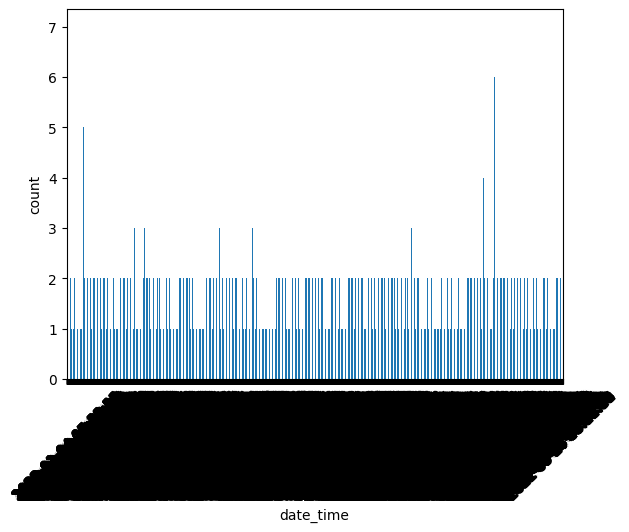

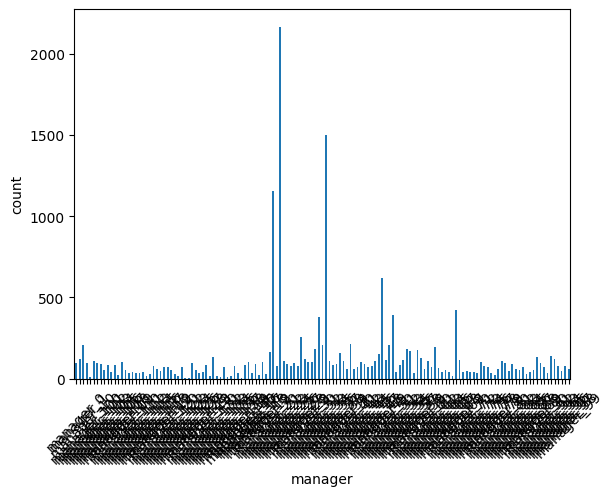

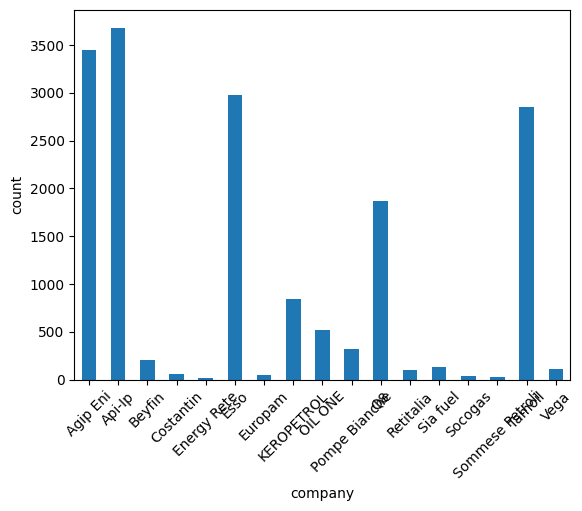

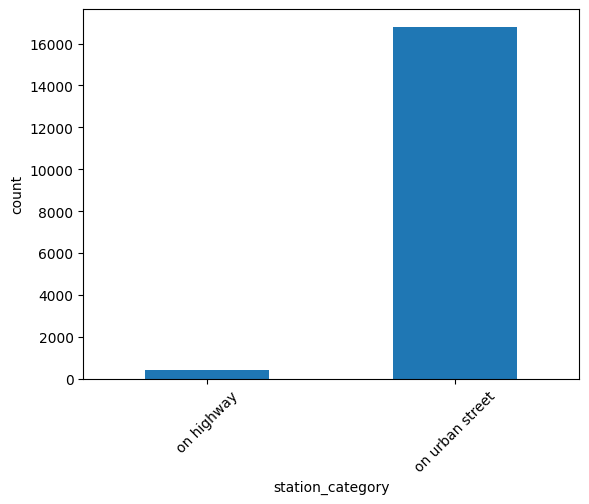

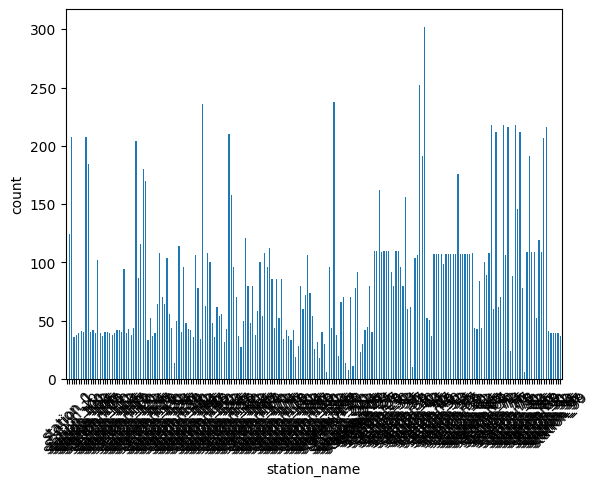

In [9]:
# Plot counts of unique values of categorical variables

for col in X_train:
    if X_train[col].dtypes == 'object':
        X_train[col].value_counts().sort_index().plot(kind='bar', rot=45, ylabel='count', xlabel=col)
    plt.show()

In [10]:
X_train["manager"].unique()

array(['manager_0', 'manager_1', 'manager_2', 'manager_3', 'manager_4',
       'manager_5', 'manager_6', 'manager_7', 'manager_8', 'manager_9',
       'manager_10', 'manager_11', 'manager_12', 'manager_13',
       'manager_14', 'manager_15', 'manager_16', 'manager_17',
       'manager_18', 'manager_19', 'manager_20', 'manager_21',
       'manager_22', 'manager_23', 'manager_24', 'manager_25',
       'manager_26', 'manager_27', 'manager_28', 'manager_29',
       'manager_30', 'manager_31', 'manager_32', 'manager_33',
       'manager_34', 'manager_35', 'manager_36', 'manager_37',
       'manager_38', 'manager_39', 'manager_40', 'manager_41',
       'manager_42', 'manager_43', 'manager_44', 'manager_45',
       'manager_46', 'manager_47', 'manager_48', 'manager_49',
       'manager_50', 'manager_51', 'manager_52', 'manager_53',
       'manager_54', 'manager_55', 'manager_56', 'manager_57',
       'manager_58', 'manager_59', 'manager_60', 'manager_61',
       'manager_62', 'manager_63', 'm

In [ ]:
X_train["manager"].value_counts()

manager_24     2165
manager_36     1498
manager_22     1157
manager_50      621
manager_7       422
               ... 
manager_137      11
manager_135       8
manager_127       6
manager_126       2
manager_140       2
Name: manager, Length: 141, dtype: int64

In [ ]:
X_train["company"].value_counts()

Api-Ip             3684
Agip Eni           3449
Esso               2976
Tamoil             2848
Q8                 1868
KEROPETROL          846
OIL ONE             522
Pompe Bianche       315
Beyfin              209
Sia fuel            136
Vega                109
Retitalia           102
Costantin            60
Europam              44
Socogas              33
Sommese Petroli      30
Energy Rete          14
Name: company, dtype: int64

In [11]:
X_train

,self_service,date_time,manager,company,station_category,station_name,latitude,longitude,price
0,1,2022-01-04 06:02:51,manager_0,Agip Eni,on highway,station_0,22.506952,20.261190,1.924
1,0,2022-01-04 06:02:51,manager_0,Agip Eni,on highway,station_0,22.506952,20.261190,2.004
2,1,2022-01-04 06:03:54,manager_1,Esso,on urban street,station_1,22.530917,20.162883,1.779
3,0,2022-01-04 06:03:54,manager_1,Esso,on urban street,station_1,22.530917,20.162883,1.969
4,1,2022-01-04 07:04:13,manager_2,Api-Ip,on urban street,station_2,22.454759,20.132374,1.819
...,...,...,...,...,...,...,...,...,...
17240,1,2022-09-27 06:56:50,manager_103,Esso,on urban street,station_174,22.486269,20.244264,1.629
17241,0,2022-09-27 06:56:50,manager_103,Esso,on urban street,station_174,22.486269,20.244264,1.829
17242,1,2022-09-27 07:03:00,manager_104,Agip Eni,on highway,station_136,22.419169,20.155163,1.729
17243,0,2022-09-27 07:03:00,manager_104,Agip Eni,on highway,station_136,22.419169,20.155163,1.939


In [ ]:
X_train["station_name"].value_counts()

station_47     302
station_45     252
station_2      238
station_15     236
station_77     218
              ... 
station_206     11
station_42      10
station_204      8
station_85       6
station_197      6
Name: station_name, Length: 208, dtype: int64

In [ ]:
X_train.describe()

,id,self_service,latitude,longitude,price
count,17245.000000,17245.000000,17245.000000,17245.000000,17245.000000
mean,8622.000000,0.640939,22.470129,20.177042,1.909863
std,4978.347032,0.479739,0.030924,0.046733,0.170933
min,0.000000,0.000000,22.354189,20.072223,1.559000
25%,4311.000000,0.000000,22.445632,20.141852,1.779000
50%,8622.000000,1.000000,22.468970,20.172881,1.881000
75%,12933.000000,1.000000,22.495231,20.211319,2.031000
max,17244.000000,1.000000,22.530917,20.354785,2.598000


In [ ]:
X_train.shape

(17245, 10)

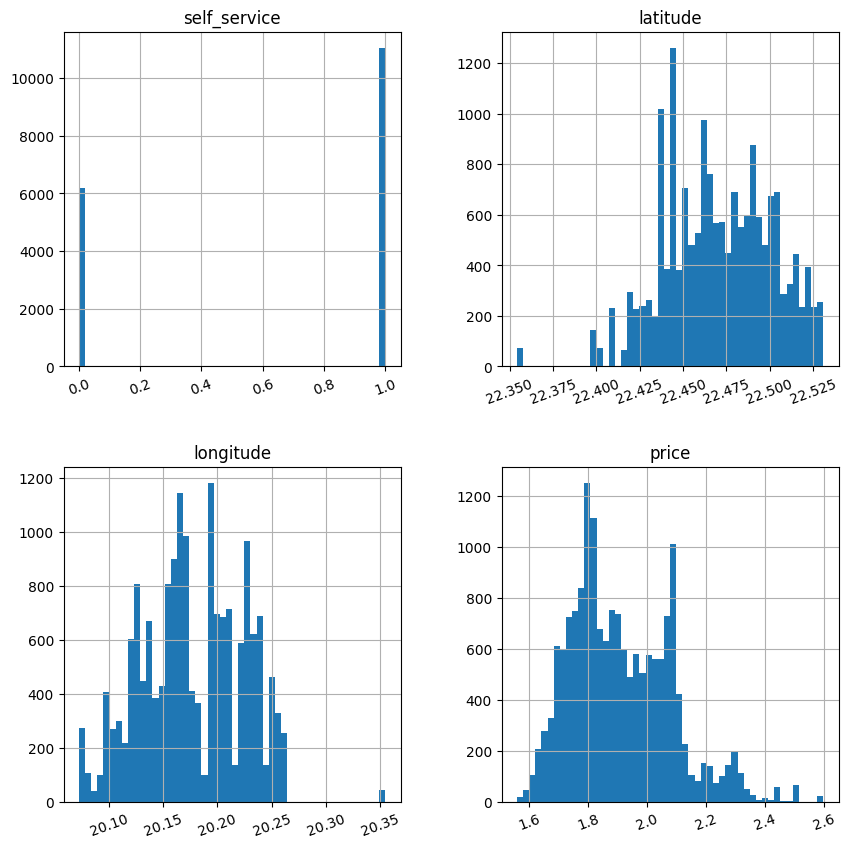

In [12]:
from numpy.lib.function_base import rot90
import matplotlib.pyplot as plt

# Assuming X_train is a DataFrame or a Series
X_train.hist(bins=50, figsize=(10, 10), xrot=20)
plt.show()


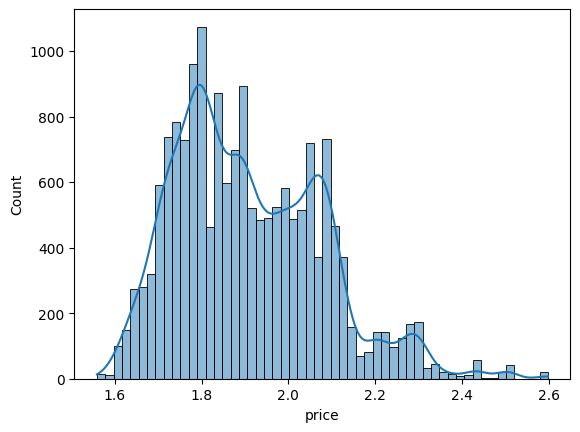

In [ ]:
# Plot the distribution of response variable
sns.histplot(x='price', data=X_train, kde=True)
plt.show()

array([[<Axes: xlabel='price', ylabel='price'>,
        <Axes: xlabel='latitude', ylabel='price'>,
        <Axes: xlabel='longitude', ylabel='price'>,
        <Axes: xlabel='self_service', ylabel='price'>],
       [<Axes: xlabel='price', ylabel='latitude'>,
        <Axes: xlabel='latitude', ylabel='latitude'>,
        <Axes: xlabel='longitude', ylabel='latitude'>,
        <Axes: xlabel='self_service', ylabel='latitude'>],
       [<Axes: xlabel='price', ylabel='longitude'>,
        <Axes: xlabel='latitude', ylabel='longitude'>,
        <Axes: xlabel='longitude', ylabel='longitude'>,
        <Axes: xlabel='self_service', ylabel='longitude'>],
       [<Axes: xlabel='price', ylabel='self_service'>,
        <Axes: xlabel='latitude', ylabel='self_service'>,
        <Axes: xlabel='longitude', ylabel='self_service'>,
        <Axes: xlabel='self_service', ylabel='self_service'>]],
      dtype=object)

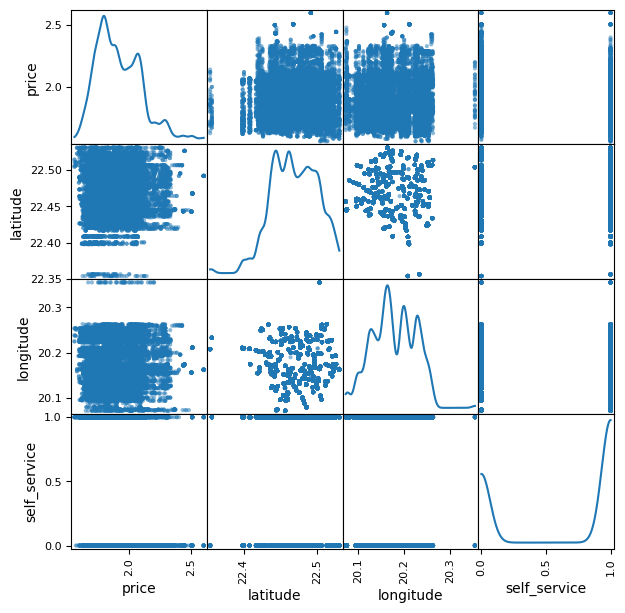

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ["price", "latitude", "longitude","self_service"]
scatter_matrix(X_train[attributes], figsize= (7,7), diagonal = "kde", )

In [ ]:
X_train.head(1)

,self_service,date_time,manager,company,station_category,station_name,latitude,longitude,price
0,1,2022-01-04 06:02:51,manager_0,Agip Eni,on highway,station_0,22.506952,20.26119,1.924


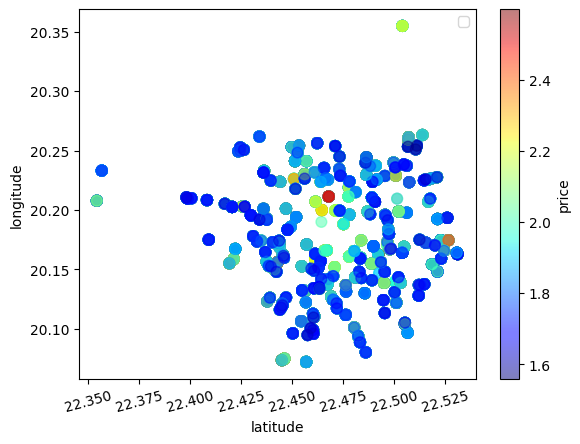

In [ ]:
X_train.plot(kind= "scatter",x= "latitude", y= "longitude" , alpha = 0.5 , s= 60 , c= "price", cmap=plt.get_cmap("jet"), colorbar= True , rot = 15 )
plt.legend()

## Handling Missing Values

In [ ]:
#Handling Missing Values
X_train.isnull().values.sum()

0

In [ ]:
# Detecting the percentage of missing values in the column

null_percent = X_train.isna().sum() / X_train.shape[0] * 100

null_percent

self_service        0.0
date_time           0.0
manager             0.0
company             0.0
station_category    0.0
station_name        0.0
latitude            0.0
longitude           0.0
price               0.0
dtype: float64

In [ ]:
# Detecting the columns with missing values

X_train.columns[X_train.isna().any()]

Index([], dtype='object')

In [ ]:
# Finding columns with missing values are le
X_train[X_train.columns[X_train.isna().any()]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17245 entries, 0 to 17244
Empty DataFrame


## Feature Engineering

In [13]:
# Convert categorical variables to indicator/binary variables
manager_intersect = np.intersect1d(X_test.manager.unique(), X_val.manager.unique())
station_intersect = np.intersect1d(X_test.station_name.unique(), X_val.station_name.unique())
company_intersect = np.intersect1d(X_test.company.unique(), X_val.company.unique())
X_train['manager'] = pd.Categorical(X_train['manager'], categories=manager_intersect)
X_test['manager'] = pd.Categorical(X_test['manager'], categories=manager_intersect)
X_train['station_name'] = pd.Categorical(X_train['station_name'], categories=station_intersect)
X_test['station_name'] = pd.Categorical(X_test['station_name'], categories=station_intersect)
X_train['company'] = pd.Categorical(X_train['company'], categories=company_intersect)
X_test['company'] = pd.Categorical(X_test['company'], categories=company_intersect)
X_train = pd.get_dummies(data=X_train, drop_first=True)
X_test = pd.get_dummies(data=X_test, drop_first=True)


In [30]:

# Assuming X_train is your DataFrame
names = X_train.columns
num_cols = len(names)

chunk_size = 100  # Number of columns to display per chunk
for i in range(0, num_cols, chunk_size):
    chunk = names[i:i + chunk_size]
    print(chunk)

Index(['self_service', 'latitude', 'longitude', 'price',
       'date_time_2022-01-04 06:03:54', 'date_time_2022-01-04 07:04:13',
       'date_time_2022-01-04 07:15:34', 'date_time_2022-01-04 07:20:18',
       'date_time_2022-01-04 07:24:37', 'date_time_2022-01-04 07:35:48',
       'date_time_2022-01-04 07:46:16', 'date_time_2022-01-04 07:50:52',
       'date_time_2022-01-04 07:52:24', 'date_time_2022-01-04 07:53:44',
       'date_time_2022-01-04 07:59:22', 'date_time_2022-01-04 08:48:06',
       'date_time_2022-01-04 08:53:40', 'date_time_2022-01-04 09:00:41',
       'date_time_2022-01-04 09:29:58', 'date_time_2022-01-04 09:36:11',
       'date_time_2022-01-04 09:48:19', 'date_time_2022-01-04 09:58:22',
       'date_time_2022-01-04 10:32:24', 'date_time_2022-01-04 10:32:25',
       'date_time_2022-01-04 10:32:44', 'date_time_2022-01-04 11:56:05',
       'date_time_2022-01-04 12:59:15', 'date_time_2022-01-04 13:25:03',
       'date_time_2022-01-04 13:31:47', 'date_time_2022-01-04 13:37

In [15]:
from sklearn.compose import ColumnTransformer

In [ ]:
num_attribs = list(X_train)
     cat_attribs = ["ocean_proximity"]
     full_pipeline = ColumnTransformer([
             ("num", num_pipeline, num_attribs),
             ("cat", OneHotEncoder(), cat_attribs),
         ])

housing_prepared = full_pipeline.fit_transform(housing)


## Model Development and Selection

In [ ]:
lr = LinearRegression()
model_reg = lr.fit(X_train[['latitude', 'longitude']], X_train['price'])
y_pred = model_reg.predict(X_test[['latitude', 'longitude']])

### Evaluation Metric

Root Mean Squared Error (MSE) = $\sqrt{\frac{1}{N} \sum_{i=1}^N (x_i - y_i)^2}$

## Generating the Prediction File

In [ ]:
df_pred = pd.concat([X_test['id'], pd.DataFrame(y_pred,columns=['pred'])], axis = 1)
df_pred.to_csv('pred_values.csv',index=False)